# Forecasting tool workflow notebook

Instructions: 
    
1. Run the codes below serially 
2. Use requirements.txt to install all libraries required with proper versions
3. Read the data and Generate feature summary (summary.xlsx) [** Dataset should be of the format: Date, Target, Other predictor variables]
4. Change inputs manually as required and save (replace) it in the same location
5. Generate the transformed data which will go as inputs to different models
6. Create train/test data by mentioning the threshold data in proper format (should match with format of the dataset)
7. Run the models one by one to get forecasts/feature results/hypeparams/diagnostic plots

[All sheets are present in the same location 'summary.xlsx']

    

In [1]:
import pandas as pd
import numpy as np
from os import getcwd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('give the input file path here')

df = df[~df.target_column_name_here.isna()].copy()

In [4]:
df = pd.read_csv('')
df = df[~df..isna()].copy()

If auto reload doesn't work after making changes in data.py/models.py/utils.py, restart the kernel

In [3]:
%load_ext autoreload
%autoreload 4

from forecasting.data import DataLoader
from forecasting.models import Forecaster

dataloader = DataLoader(df, 'time column','target column','default frequency','target aggregated frequency')

D: calendar day frequency

W: weekly frequency (If your date starts from Monday mention 'W-Mon', for Tuesday: 'W-Tue' and so on..., default 'W' is for Sunday)

M: month end frequency

MS: month start frequency

QS: quarter start frequency

H: hourly frequency

summary.xlsx file has been generated and saved to C:\Users\SutirthaBiswas\Downloads\forecasting tool\forecasting
Plots Summary.xlsx file has been generated and saved to C:\Users\SutirthaBiswas\Downloads\forecasting tool\forecasting
Summary Dictionary.md file has been generated and saved to C:\Users\SutirthaBiswas\Downloads\forecasting tool\forecasting


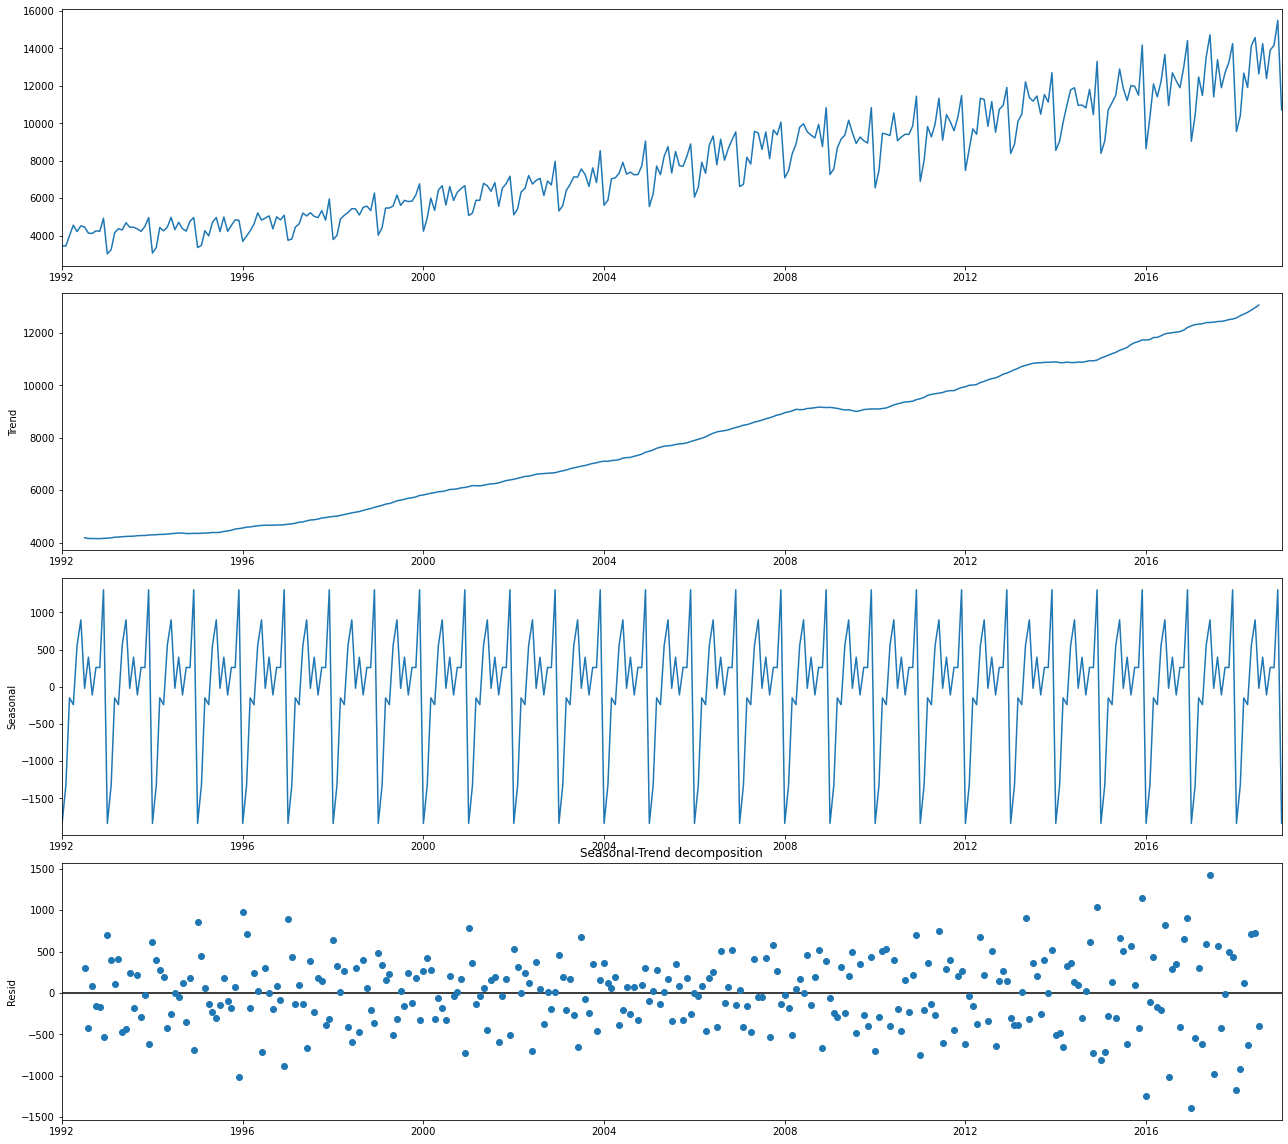

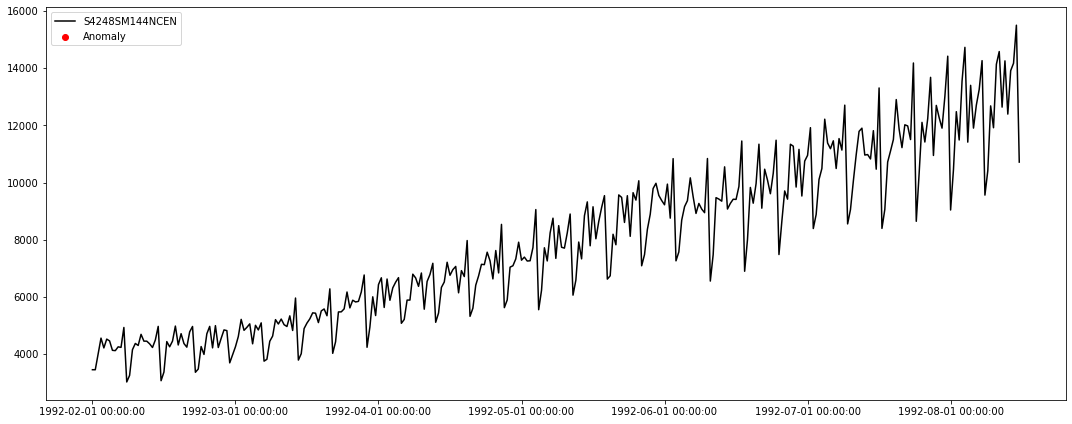

In [5]:
dataloader = DataLoader(df, 'DATE','S4248SM144NCEN','MS')
dataloader.generate_summary()

Creates the transformed data based on user settings 

In [13]:
res = dataloader.transform_data()
res

Creates time columns (year/month)

In [15]:
res['data'],dummy_columns= DataLoader.create_time_dummies(res['data'], res['date_column'], year=True,month=True)

1. Change time column name

2. Mention the date about which train-test split will be done

In [16]:
train, test = res['data'][res['data']['timeStamp'] < '2016-01-01'], res['data'][res['data']['timeStamp'] >= '2016-01-01']

Following are 3 forecasting techniques: Prophet, ARIMA and Linear Regression. Before running the 3 cells ensure to change the date_freq to your aggregate frequency

Also you can change the #num_iterations in forecaster.fit(train,test,#num_iterations) for manipulating best model search space

### Prophet

In [17]:
import logging
prophet_logger = logging.getLogger('cmdstanpy')
prophet_logger.setLevel(logging.ERROR)

15:53:31 - cmdstanpy - INFO - Chain [1] start processing
15:53:31 - cmdstanpy - INFO - Chain [1] done processing
15:53:32 - cmdstanpy - INFO - Chain [1] start processing
15:54:17 - cmdstanpy - INFO - Chain [1] done processing
15:54:18 - cmdstanpy - INFO - Chain [1] start processing
15:54:18 - cmdstanpy - INFO - Chain [1] done processing
15:54:19 - cmdstanpy - INFO - Chain [1] start processing
15:54:56 - cmdstanpy - INFO - Chain [1] done processing
15:54:57 - cmdstanpy - INFO - Chain [1] start processing
15:54:57 - cmdstanpy - INFO - Chain [1] done processing
15:54:58 - cmdstanpy - INFO - Chain [1] start processing
15:55:45 - cmdstanpy - INFO - Chain [1] done processing
15:55:45 - cmdstanpy - INFO - Chain [1] start processing
15:55:46 - cmdstanpy - INFO - Chain [1] done processing
15:55:46 - cmdstanpy - INFO - Chain [1] start processing
15:55:46 - cmdstanpy - INFO - Chain [1] done processing
15:55:47 - cmdstanpy - INFO - Chain [1] start processing
15:55:48 - cmdstanpy - INFO - Chain [1]

time taken: 139.56212210655212
MAPE: 16.8161731975562
RMSE: 899149.8639250818
R2 score: -0.04147962082962353
Diagnostic Plots.xlsx file has been generated and saved to C:\Users\SutirthaBiswas\Downloads\forecasting tool\forecasting


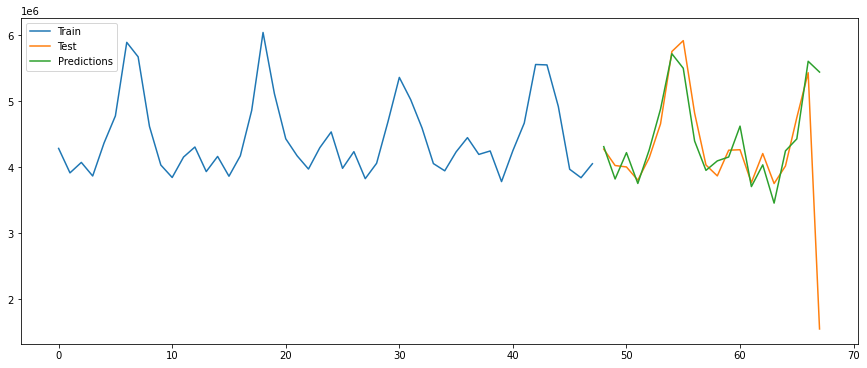

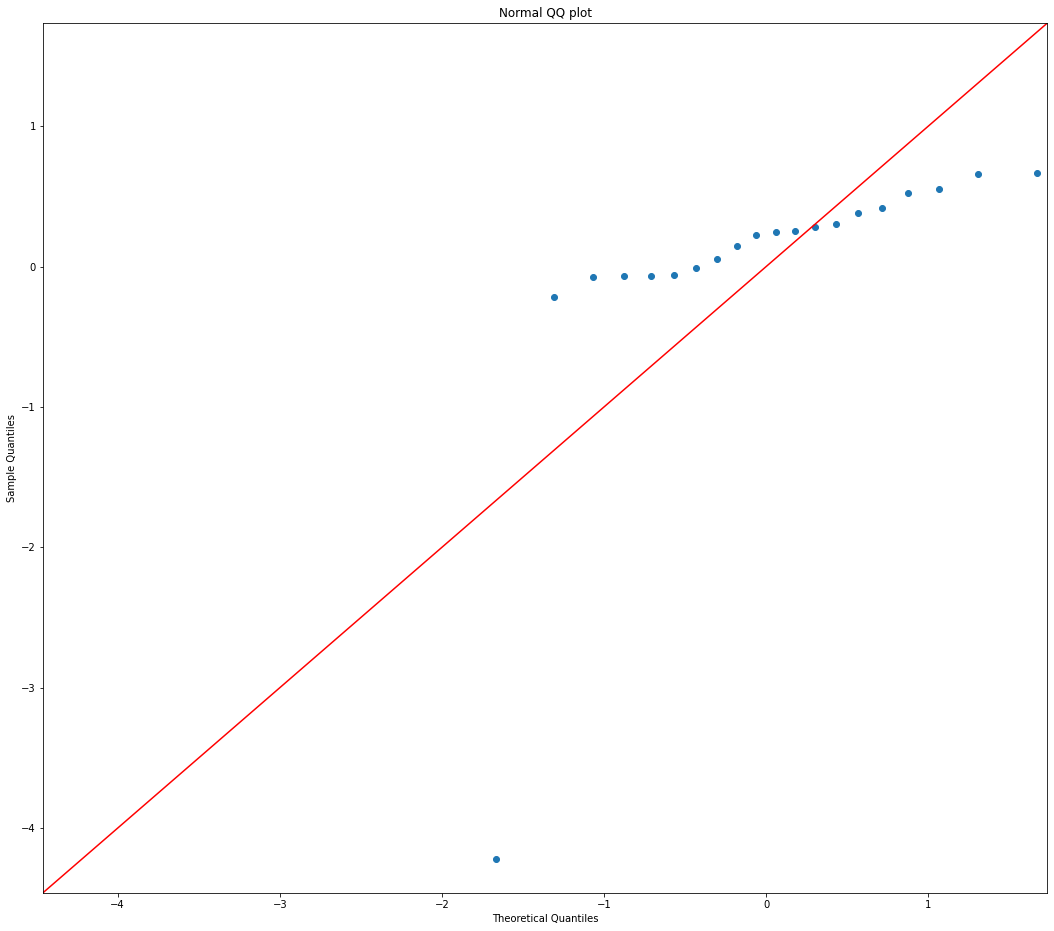

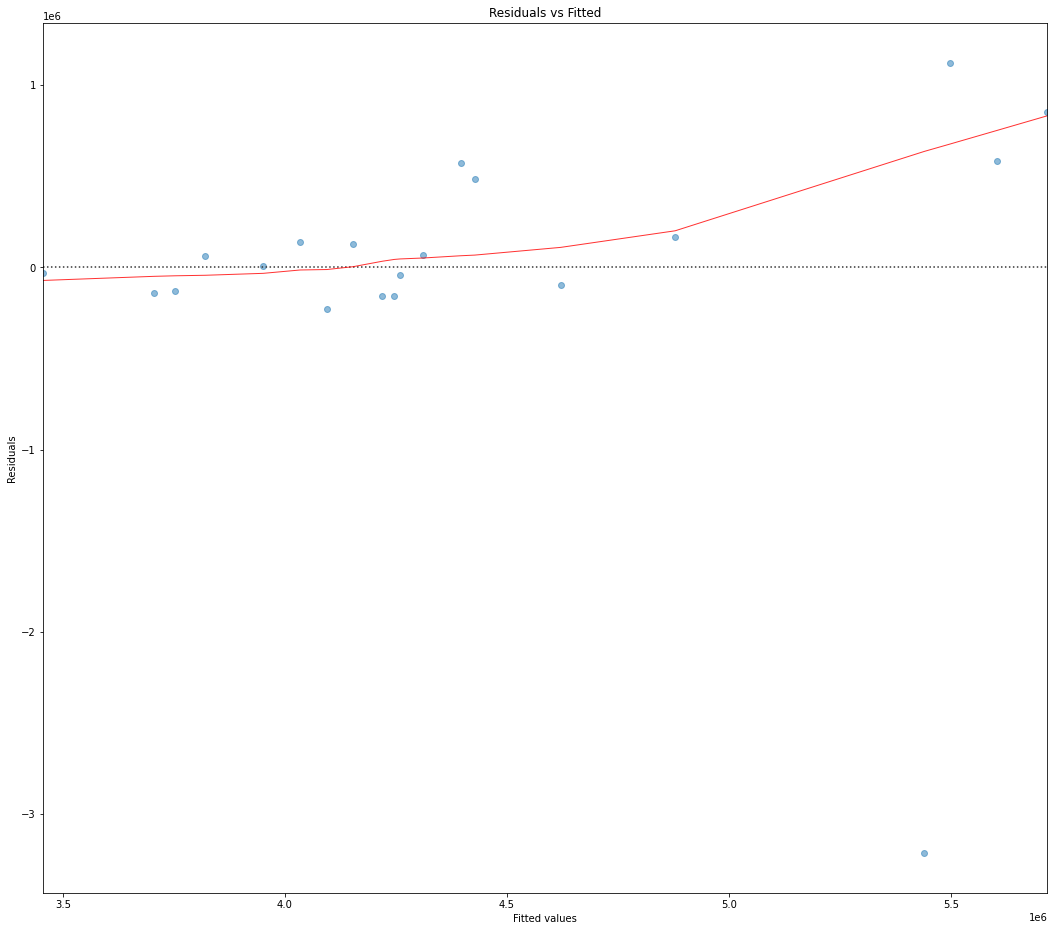

In [18]:


forecaster = Forecaster(date_column = res['date_column'], 
                        output_column = res['output_column'], 
                        feature_transform_dict = res['feature_transform_input'],
                        algorithm = 'prophet',
                        date_freq = 'M')

forecaster.fit(train,test,5)

### ARIMA/SARIMA

[]
None
[]
None
['temp_lags_2']
    temp_lags_2
0     37.174288
1     37.174288
2     37.174288
3     40.448046
4     49.631735
5     54.255903
6     64.188078
7     70.434472
8     77.742823
9     73.931344
10    67.098111
11    58.495269
12    44.917972
13    41.895202
14    34.758696
15    34.200104
16    39.203684
17    51.511069
18    60.596653
19    72.130931
20    79.547970
21    74.128616
22    67.356694
23    60.257863
24    45.345000
25    38.169489
26    28.454960
27    31.079911
28    36.950257
29    50.273653
30    62.835726
31    71.607597
32    75.764597
33    73.850605
34    69.415847
35    59.771989
36    44.710417
37    40.010255
38    29.545659
39    23.728973
40    36.857449
41    52.171667
42    64.964476
43    69.995625
44    77.443575
45    77.513295
46    72.414196
47    56.455385
['temp_lags_2']
    temp_lags_2
48    51.753107
49    50.767360
50    34.228524
51    36.972602
52    47.395338
53    51.762016
54    61.563575
55    71.650322
56    78.634318
57    78

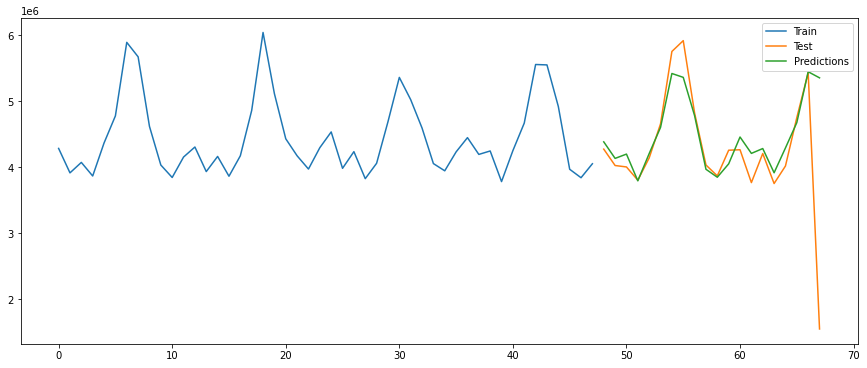

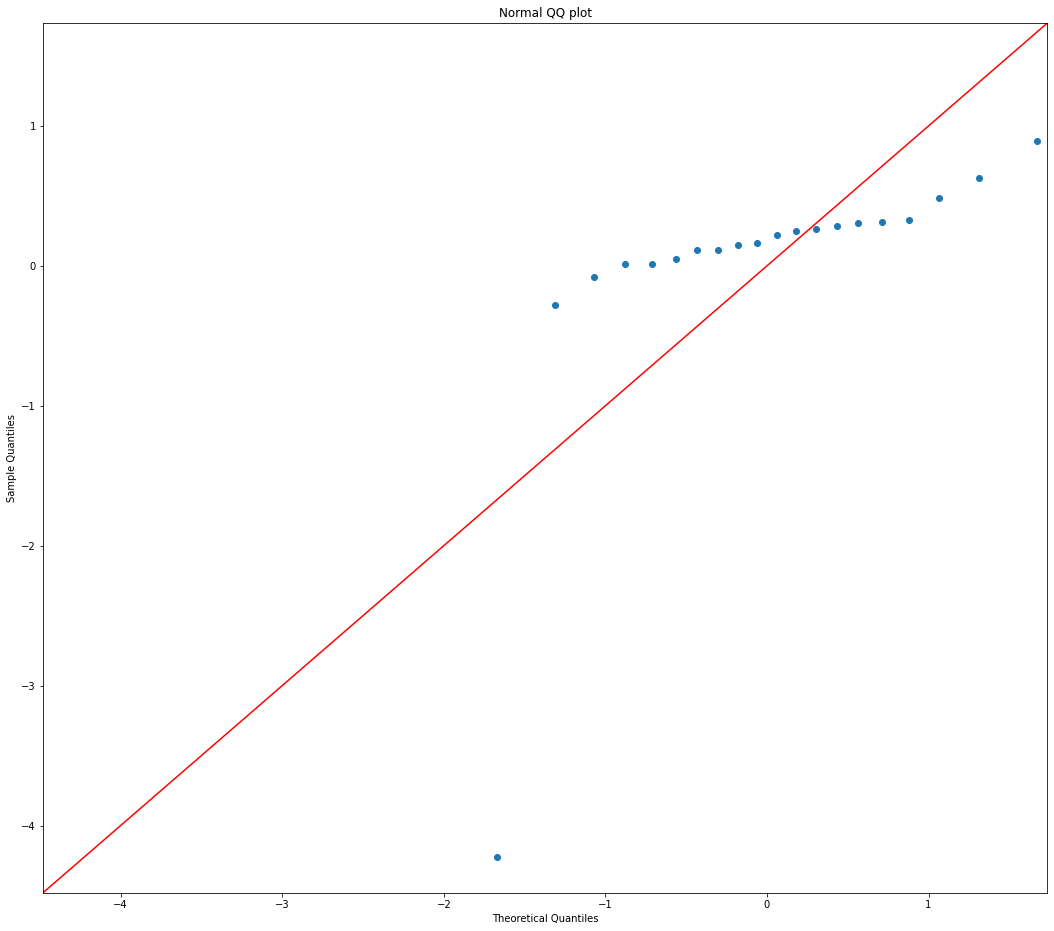

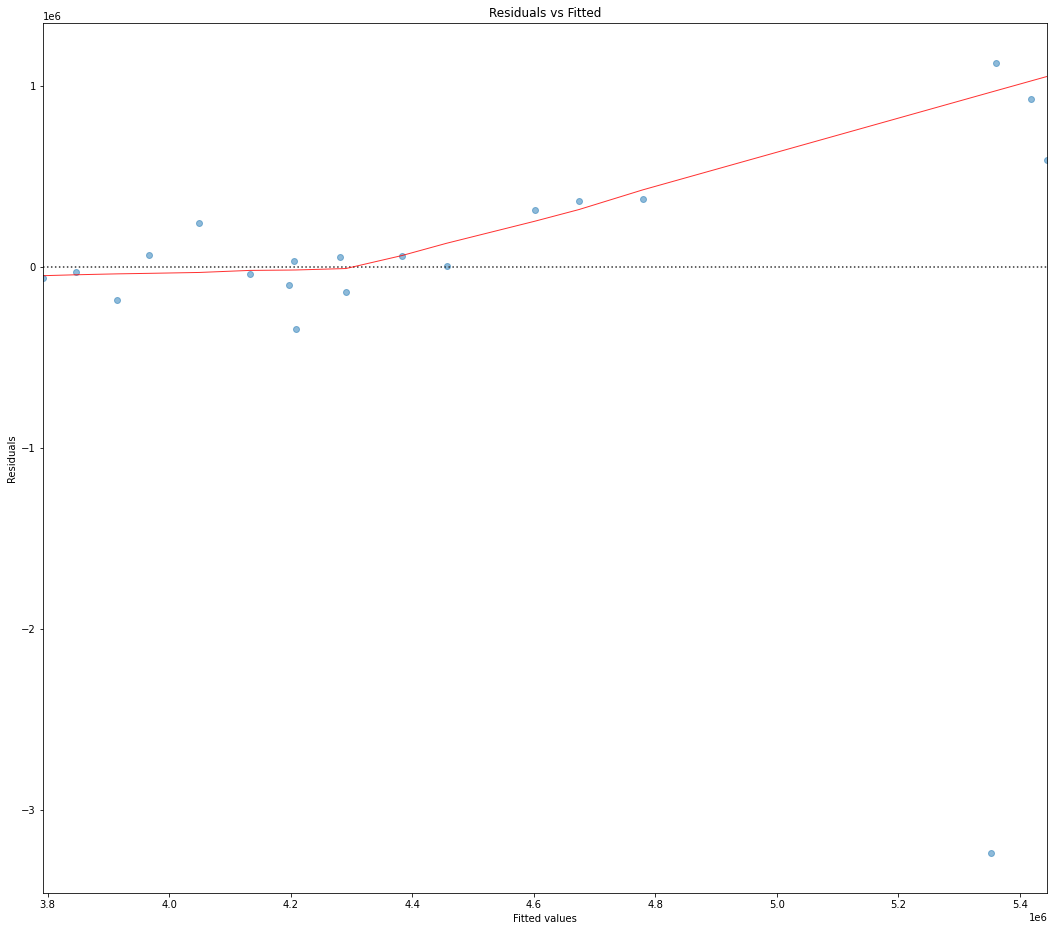

In [11]:
forecaster = Forecaster(res['date_column'], res['output_column'], res['feature_transform_input'],'arima','M')
forecaster.fit(train,test,5)

#### LR

time taken: 0.0569002628326416
MAPE: 11.292574208579639
RMSE: 828.5922645255943
R2 score: -0.0008882871366553413
Diagnostic Plots.xlsx file has been generated and saved to C:\Users\SutirthaBiswas\Downloads\forecasting tool\forecasting


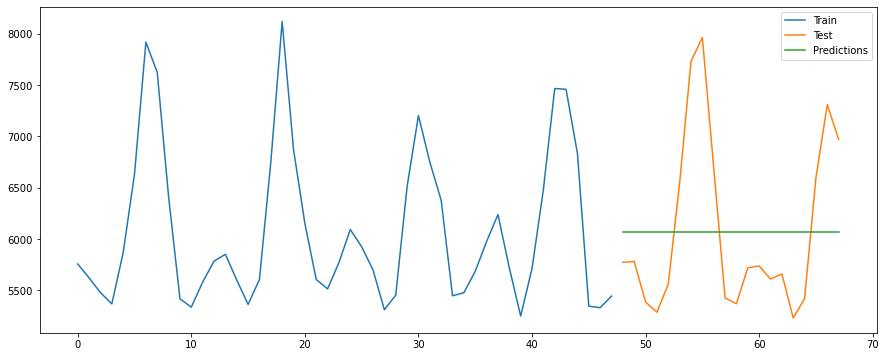

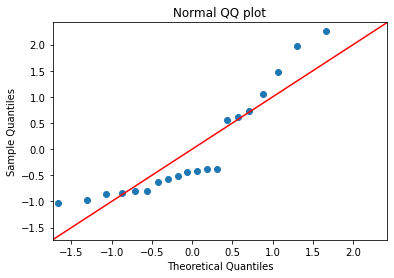

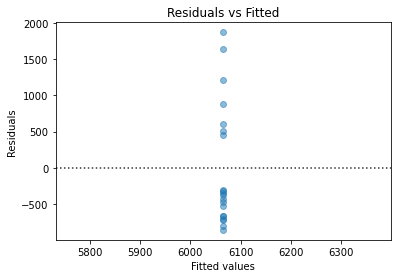

In [18]:
forecaster = Forecaster(res['date_column'], res['output_column'], res['feature_transform_input'],'lr','M',dummy_columns = dummy_columns)
forecaster.fit(train,test,5)

In [139]:
forecaster.best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.001092
Date:                Mon, 27 Feb 2023   Prob (F-statistic):              0.974
Time:                        01:40:15   Log-Likelihood:                -385.60
No. Observations:                  48   AIC:                             775.2
Df Residuals:                      46   BIC:                             778.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6064.9938    128.755     47.105      0.000    5805.823    6324.164
year_2015      8.1768    247.408      0.033      0.974    -489.829     506.183
==============================================================================
Omnibus:                       10.264   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.432
Skew:                           1.130   Prob(JB):                      0.00543
Kurtosis:                       3.326   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""